(50000, 32, 32, 3)
(50000, 10)
Epoch 1/40
782/782 [==============================] - 17s 20ms/step - loss: 2.7089 - accuracy: 0.3506 - val_loss: 1.2494 - val_accuracy: 0.5770
Epoch 2/40
782/782 [==============================] - 15s 19ms/step - loss: 1.1538 - accuracy: 0.6082 - val_loss: 0.9373 - val_accuracy: 0.6924
Epoch 3/40
782/782 [==============================] - 15s 20ms/step - loss: 0.9523 - accuracy: 0.6823 - val_loss: 0.8458 - val_accuracy: 0.7266
Epoch 4/40
782/782 [==============================] - 15s 19ms/step - loss: 0.8334 - accuracy: 0.7228 - val_loss: 0.8767 - val_accuracy: 0.7154
Epoch 5/40
782/782 [==============================] - 16s 20ms/step - loss: 0.7645 - accuracy: 0.7489 - val_loss: 0.7603 - val_accuracy: 0.7557
Epoch 6/40
782/782 [==============================] - 16s 20ms/step - loss: 0.7217 - accuracy: 0.7668 - val_loss: 0.7214 - val_accuracy: 0.7700
Epoch 7/40
782/782 [==============================] - 16s 20ms/step - loss: 0.6844 - accuracy: 0.7783 - v

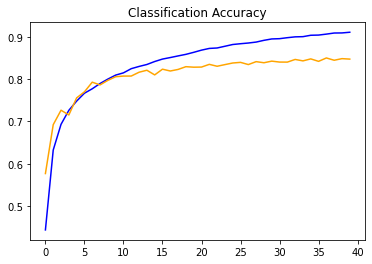

Accuracy: 84.73%


In [5]:
from matplotlib import pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation
from keras.layers import Flatten, BatchNormalization
from keras import regularizers
from keras.optimizers import SGD
from keras.utils import np_utils


(train_x, train_y), (val_x, val_y) = cifar10.load_data()

train_x = train_x.astype('float32')
val_x = val_x.astype('float32')
train_x = train_x / 255.0
val_x = val_x / 255.0


train_y = np_utils.to_categorical(train_y)
val_y = np_utils.to_categorical(val_y)
num_classes = val_y.shape[1]

print(train_x.shape)
print(train_y.shape)

weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(32,32,3)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

epochs = 40
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history = model.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=epochs, batch_size=64)

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.show()

scores = model.evaluate(val_x, val_y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


